In [4]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def rmse_cv(model, X, y):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [5]:
X_train_df = pd.read_csv("../data/offline/X_train2.csv", index_col=0)
y_train_df = pd.read_csv("../data/offline/y_train2.csv", index_col=0)
X_test_df = pd.read_csv("../data/offline/X_test2.csv", index_col=0)
combine_df = pd.concat([X_train_df, X_test_df])

In [6]:
model_ridge = Ridge()

In [7]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha), X_train_df.values, y_train_df['SalePrice'].values).mean() 
            for alpha in alphas]

In [9]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

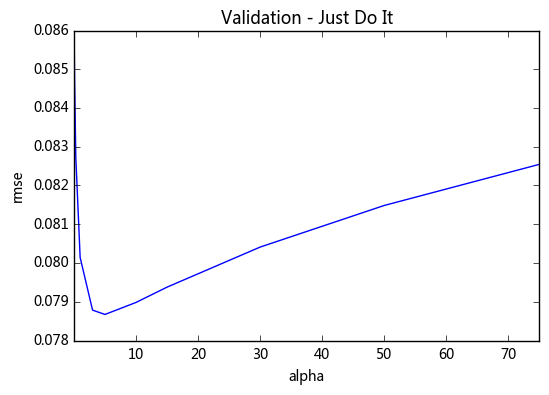

In [10]:
plt.show()

In [11]:
cv_ridge.min()

0.078672356339009486

In [13]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train_df, y_train_df)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
rmse_cv(model_lasso, X_train_df, y_train_df).mean()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might 

0.076697765612090935

In [18]:
y_predict = np.expm1(model_lasso.predict(X_test_df))

In [20]:
y_predict_df = pd.DataFrame({"Id":X_test_df.index, "SalePrice":y_predict})

In [24]:
y_predict_df.to_csv('../data/online/predict2.csv', header = True, index=False)

In [23]:
X_test_df.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)